In [44]:
# Segment tree node
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.total = 0
        self.left = None
        self.right = None

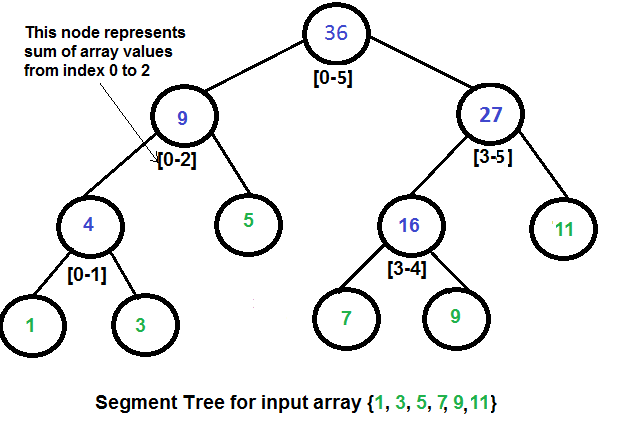

**Range-Sum Queries**

In [65]:
# helper function to create the tree from input array
def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        n.total = nums[l]
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    root.total = root.left.total + root.right.total

    return root


# Helper function to update a value
def updateVal(root, i, val):
    if not root or root.start > i or root.end < i:
        return

    # Base case. The actual value will be updated in a leaf.
    # The total is then propogated upwards
    if root.start == i and root.end == i:
        root.total = val
        return

    updateVal(root.left, i, val)
    updateVal(root.right, i, val)
    root.total = root.left.total + root.right.total
    # return


# Helper function to calculate range sum
def rangeSum(root, i, j):
    if not root or root.start > j or root.end < i:
        return 0
    if root.start >= i and root.end <= j:
        return root.total

    return rangeSum(root.left, i, j) + rangeSum(root.right, i, j)

In [66]:
arr = [1, 3, 5]
n = len(arr)

In [67]:
root = createTree(arr, 0, n - 1)

In [68]:
rangeSum(root, 0, 2)

9

In [69]:
updateVal(root, 1, 2)

In [70]:
rangeSum(root, 0, 2)

8

Count Even Or Odd

In [1]:
# Segment tree node
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.even = 0
        self.odd = 0
        self.left = None
        self.right = None

In [5]:
# helper function to create the tree from input array
def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        if nums[l] % 2 == 0:
            n.even = 1
        else:
            n.odd = 1
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    root.even = root.left.even + root.right.even
    root.odd = root.left.odd + root.right.odd

    return root


# Helper function to update a value
def updateVal(root, i, val):
    if not root or root.start > i or root.end < i:
        return

    # Base case. The actual value will be updated in a leaf.
    # The total is then propogated upwards
    if root.start == i and root.end == i:
        if val % 2 == 0:
            root.even = 1
        else:
            root.odd = 1
        return

    updateVal(root.left, i, val)
    updateVal(root.right, i, val)
    root.even = root.left.even + root.right.even
    root.odd = root.left.odd + root.right.odd
    return


# Helper function to calculate range sum
def rangeSum_even(root, i, j):
    if not root or root.start > j or root.end < i:
        return 0
    if root.start >= i and root.end <= j:
        return root.even

    return rangeSum_even(root.left, i, j) + rangeSum_even(root.right, i, j)


def rangeSum_odd(root, i, j):
    if not root or root.start > j or root.end < i:
        return 0
    if root.start >= i and root.end <= j:
        return root.odd

    return rangeSum_odd(root.left, i, j) + rangeSum_odd(root.right, i, j)

In [6]:
arr = [1, 2, 3, 4, 5, 6]

In [7]:
root = createTree(arr, 0, len(arr) - 1)

In [8]:
rangeSum_even(root, 0, 5)

3

In [10]:
rangeSum_odd(root, 0, 5)

3

In [11]:
updateVal(root, 5, 7)

In [12]:
rangeSum_odd(root, 0, 5)

4

**Min-Max Queries**

In [4]:
# helper function to create the tree from input array
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.total = 0
        self.left = None
        self.right = None


def createTree(nums, l, r):

    # base case

    if l > r:

        return None

    # leaf node

    if l == r:

        n = Node(l, r)

        n.total = nums[l]
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree

    root.left = createTree(nums, l, mid)

    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root

    # i.e. those elements lying between (start, end)

    root.total = max(root.left.total, root.right.total)

    return root


# Helper function to update a value


def updateVal(root, i, val):
    if root.start > i or root.end < i:
        return

    # Base case. The actual value will be updated in a leaf.

    # The total is then propogated upwards

    if root.start == root.end == i:

        root.total = val
        return

    # If the index is less than the mid, that leaf must be in the left subtree

    updateVal(root.left, i, val)

    # Otherwise, the right subtree

    updateVal(root.right, i, val)

    # Propogate the changes after recursive call returns

    root.total = max(root.left.total, root.right.total)

    return


# Helper function to calculate range sum


def rangemax(root, i, j):
    if root.start > j or root.end < i:
        return 0

    # If the range exactly matches the root, we already have the sum

    if root.start >= i and root.end <= j:
        return root.total

    return max(rangemax(root.left, i, j), rangemax(root.right, i, j))

In [5]:
arr = [1, 3, 5, 7, 9, 11]
n = len(arr)

In [6]:
root = createTree(arr, 0, n - 1)

In [7]:
rangemax(root, 1, 3)

7

In [10]:
updateVal(root, 3, -5)

In [11]:
rangemax(root, 1, 4)

5

**count of even digit sum elements in the given range**

In [29]:
def digitSum(num):

    sum = 0
    while num:
        sum += num % 10
        num //= 10

    return 1 if sum % 2 == 0 else 0

In [49]:
# helper function to create the tree from input array
def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        n.total = digitSum(nums[l])
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    root.total = root.left.total + root.right.total

    return root


# Helper function to update a value
def updateVal(root, i, val):

    # Base case. The actual value will be updated in a leaf.
    # The total is then propogated upwards
    if root.start == root.end:
        root.total = digitSum(val)
        return val

    mid = (root.start + root.end) // 2

    # If the index is less than the mid, that leaf must be in the left subtree
    if i <= mid:
        updateVal(root.left, i, val)

    # Otherwise, the right subtree
    else:
        updateVal(root.right, i, val)

    # Propogate the changes after recursive call returns
    root.total = root.left.total + root.right.total

    return root.total


# Helper function to calculate range sum
def rangesum(root, i, j):

    # If the range exactly matches the root, we already have the sum
    if root.start == i and root.end == j:
        return root.total

    mid = (root.start + root.end) // 2

    # If end of the range is less than the mid, the entire interval lies
    # in the left subtree
    if j <= mid:
        return rangesum(root.left, i, j)

    # If start of the interval is greater than mid, the entire inteval lies
    # in the right subtree
    elif i >= mid + 1:
        return rangesum(root.right, i, j)

    # Otherwise, the interval is split. So we calculate the sum recursively,
    # by splitting the interval
    else:
        return rangesum(root.left, i, mid) + rangesum(root.right, mid + 1, j)

In [50]:
arr = [7, 3, 19, 13, 5, 4]
n = len(arr)
root = createTree(arr, 0, n - 1)

In [51]:
rangesum(root, 1, 5)

3

In [52]:
rangesum(root, 3, 5)

2

**elements greater than K in the given index range using**

In [17]:
def merge(v1, v2):
    i = 0
    j = 0

    # Final vector to return
    # after merging
    v = []

    # Loop continues until it reaches
    # the end of one of the vectors
    while i < len(v1) and j < len(v2):
        if v1[i] <= v2[j]:
            v.append(v1[i])
            i += 1
        else:
            v.append(v2[j])
            j += 1

    # Here, simply add the remaining
    # elements to the vector v
    for k in range(i, len(v1)):
        v.append(v1[k])
    for k in range(j, len(v2)):
        v.append(v2[k])
    return v

In [18]:
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.values = None
        self.left = None
        self.right = None

In [77]:
# Python3 implementation of the approach
from bisect import bisect_left as lower_bound


# helper function to create the tree from input array
def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        n.values = [nums[l]]
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    root.values = merge(root.left.values, root.right.values)

    return root


# Helper function to update a value
# here we have to update so that array remain sorted
def updateVal(root, i, val):
    if root.start > i or root.end < i:
        return

    # Base case. The actual value will be updated in a leaf.
    # The total is then propogated upwards
    if root.start == i and root.end == i:
        root.values = [val]
        return

    updateVal(root.left, i, val)

    updateVal(root.right, i, val)

    # Propogate the changes after recursive call returns
    root.values = merge(root.left.values, root.right.values)

    return


def search(arr, k):
    if len(arr) == 0:
        return 0
    if len(arr) == 1:
        if arr[0] >= k:
            return 1
        return 0

    l = 0
    r = len(arr) - 1
    while l <= r:
        mid = l + (r - l) // 2
        if arr[mid] >= k:
            r = mid - 1
        else:
            ans = mid
            l = mid + 1
    return len(arr) - ans


# Helper function to calculate range sum
def rangesum(root, i, j, k):
    if root.start > j or root.end < i:
        return 0

    # If the range exactly matches the root, we already have the sum
    if root.start >= i and root.end <= j:
        return lower_bound(root.values, k)

    return rangesum(root.left, i, j, k) + rangesum(root.right, i, j, k)

In [78]:
def postorder(root):
    if root == None:
        return
    postorder(root.left)
    postorder(root.right)
    print(root.values)

In [79]:
arr = [7, 3, 9, 13, 5, 4]
n = len(arr)
root = createTree(arr, 0, n - 1)

In [80]:
for i in range(len(arr) - 1, -1, -1):
    print(arr[i], rangesum(root, i, n - 1, arr[i]))

4 0
5 1
13 2
9 2
3 0
7 3


In [81]:
for i in range(len(arr)):
    print(arr[i], rangesum(root, 0, i, arr[i]))

7 0
3 0
9 2
13 3
5 1
4 1


In [69]:
rangesum(root, 1, 4, 6)

2

In [70]:
rangesum(root, 1, 5, 3)

5

In [71]:
updateVal(root, 2, 2)

In [72]:
rangesum(root, 1, 5, 3)

4

**greatest pair sum in the given range**

In [96]:
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.values = None
        self.maxnum = -1
        self.left = None
        self.right = None

In [101]:
# helper function to create the tree from input array
def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        n.values = nums[l]
        n.maxnum = nums[l]
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    # curr = max(root.left.values , root.right.values,root.left.maxnum+root.right.maxnum)
    root.values = max(
        root.left.values, root.right.values, root.left.maxnum + root.right.maxnum
    )
    root.maxnum = max(root.left.maxnum, root.right.maxnum)

    return root


# Helper function to calculate range sum
def rangesum(root, i, j):

    # If the range exactly matches the root, we already have the sum
    if root.start == i and root.end == j:
        return root.values

    mid = (root.start + root.end) // 2

    # If end of the range is less than the mid, the entire interval lies
    # in the left subtree
    if j <= mid:
        return rangesum(root.left, i, j)

    # If start of the interval is greater than mid, the entire inteval lies
    # in the right subtree
    elif i >= mid + 1:
        return rangesum(root.right, i, j)

    # Otherwise, the interval is split. So we calculate the sum recursively,
    # by splitting the interval
    else:
        return max(rangesum(root.left, i, mid), rangesum(root.right, mid + 1, j))

In [102]:
arr = [1, 3, 2, 7, 9, 11]
n = len(arr)
root = createTree(arr, 0, n - 1)

In [103]:
rangesum(root, 1, 4)

16

**number of occurrences of the most frequent value within a given range**

In [109]:
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.values = None
        self.freq = None
        self.left = None
        self.right = None

In [117]:
from collections import Counter


def combine(r1, r2):
    nums = r1.values + r2.values
    d = Counter(nums)
    return max(d.values())


def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        n.values = [nums[l]]
        n.freq = 1
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    # curr = max(root.left.values , root.right.values,root.left.maxnum+root.right.maxnum)
    root.values = root.left.values + root.right.values
    root.freq = combine(root.left, root.right)

    return root


# Helper function to calculate range sum
def rangesum(root, i, j):

    # If the range exactly matches the root, we already have the sum
    if root.start == i and root.end == j:
        return root.freq

    mid = (root.start + root.end) // 2

    # If end of the range is less than the mid, the entire interval lies
    # in the left subtree
    if j <= mid:
        return rangesum(root.left, i, j)

    # If start of the interval is greater than mid, the entire inteval lies
    # in the right subtree
    elif i >= mid + 1:
        return rangesum(root.right, i, j)

    # Otherwise, the interval is split. So we calculate the sum recursively,
    # by splitting the interval
    else:
        return max(rangesum(root.left, i, mid), rangesum(root.right, mid + 1, j))


def updateVal(root, i, val):

    # Base case. The actual value will be updated in a leaf.
    # The total is then propogated upwards
    if root.start == root.end:
        root.values = [val]
        root.freq = 1
        return n

    mid = (root.start + root.end) // 2

    # If the index is less than the mid, that leaf must be in the left subtree
    if i <= mid:
        updateVal(root.left, i, val)

    # Otherwise, the right subtree
    else:
        updateVal(root.right, i, val)

    # Propogate the changes after recursive call returns
    root.values = root.left.values + root.right.values
    root.freq = combine(root.left, root.right)

    return root

In [118]:
arr = [-5, -5, 2, 2, 2, 2, 3, 7, 7, 7]
n = len(arr)
root = createTree(arr, 0, n - 1)

In [119]:
rangesum(root, 0, 9)

4

In [120]:
updateVal(root, 0, 2)

In [121]:
rangesum(root, 0, 9)

5

**find the frequency of a given value in a given subarray**

In [22]:
from collections import defaultdict


class Node:
    def __init__(self, start, end) -> None:
        self.start = start
        self.end = end
        self.left = None
        self.right = None
        self.freq = defaultdict(int)

In [51]:
def mergefreq(d1, d2):
    for key in d2:
        d1[key] = d1[key] + d2[key]
    return d1


def maketree(nums, l, r):
    if l > r:
        return None
    if l == r:
        curr = Node(l, r)
        curr.freq[nums[l]] = 1
        return curr

    mid = (l + r) // 2
    root = Node(l, r)
    root.left = maketree(nums, l, mid)
    root.right = maketree(nums, mid + 1, r)
    root.freq = mergefreq(root.left.freq, root.right.freq)
    return root


def get_freq(root, l, r, k):
    if root.start == l and root.end == r:
        return root.freq[k]

    mid = (l + r) // 2

    if r <= mid:
        return get_freq(root.left, l, r, k)
    elif l >= mid + 1:
        return get_freq(root.right, l, r, k)
    else:
        return get_freq(root.left, l, mid, k) + get_freq(root.right, mid + 1, r, k)

In [52]:
def postorder(root):
    if root == None:
        return
    postorder(root.left)
    postorder(root.right)
    print(root.freq)

In [53]:
nums = [12, 33, 4, 56, 22, 2, 34, 33, 22, 12, 34, 56]
n = len(nums) - 1

In [54]:
root = maketree(nums, 0, n)

In [56]:
get_freq(root, 0, 11, 33)

2

In [89]:
# helper function to create the tree from input array
class Node(object):
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.values = 0
        self.left = None
        self.right = None


def createTree(nums, l, r):

    # base case
    if l > r:
        return None

    # leaf node
    if l == r:
        n = Node(l, r)
        n.values = nums[l]
        return n

    mid = (l + r) // 2

    root = Node(l, r)

    # recursively build the Segment tree
    root.left = createTree(nums, l, mid)
    root.right = createTree(nums, mid + 1, r)

    # Total stores the sum of all leaves under root
    # i.e. those elements lying between (start, end)
    # curr = max(root.left.values , root.right.values,root.left.maxnum+root.right.maxnum)
    root.values = max(
        root.left.values, root.right.values, root.left.values + root.right.values
    )

    return root


# Helper function to calculate range sum
def rangesum(root, i, j):
    if root.start > j or root.end < i:
        return 0

    # If the range exactly matches the root, we already have the sum
    if root.start >= i and root.end <= j:
        return root.values

    rangesum(root.left, i, j)

    # If start of the interval is greater than mid, the entire inteval lies
    # in the right subtree
    rangesum(root.right, i, j)

    # Otherwise, the interval is split. So we calculate the sum recursively,
    # by splitting the interval

    return max(rangesum(root.left, i, j), rangesum(root.right, i, j))

In [90]:
arr = [1, 2, 3, 4, -5]
root = createTree(arr, 0, len(arr) - 1)

In [91]:
def postorder(root):
    if root == None:
        return
    postorder(root.left)
    postorder(root.right)
    print(root.values)


postorder(root)

1
2
3
3
6
4
-5
-1
5


In [86]:
rangesum(root, 1, 3)

4

You are implementing a program to use as your calendar. We can add a new event if adding the event will not cause a double booking.

A double booking happens when two events have some non-empty intersection (i.e., some moment is common to both events.).

The event can be represented as a pair of integers start and end that represents a booking on the half-open interval [start, end), the range of real 

numbers x such that start <= x < end.

In [ ]:
class MyCalendar:

    def __init__(self):
        self.arr = []

    def book(self, start: int, end: int) -> bool:
        for b in self.arr:
            if (
                (b[0] < start < b[1])
                or (b[0] < end < b[1])
                or (start <= b[0] and end >= b[1])
            ):
                return False

        self.arr.append([start, end])
        return True


class Node:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.left = None
        self.right = None


class Tree:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        self.left = None
        self.right = None

    def insert(self, start, end):
        curr = self
        while True:
            if start >= curr.end:
                if not curr.right:
                    curr.right = Tree(start, end)
                    return True
                curr = curr.right
            elif end <= curr.start:
                if not curr.left:
                    curr.left = Tree(start, end)
                    return True
                curr = curr.left
            else:
                return False


class MyCalendar:

    def __init__(self):
        self.root = None

    def book(self, start: int, end: int) -> bool:
        if not self.root:
            self.root = Tree(start, end)
            return True
        return self.root.insert(start, end)


class MyCalendar:

    def __init__(self):
        self.root = None

    def book(self, start: int, end: int) -> bool:
        if not self.root:
            self.root = Node(start, end)
            return True

        return self.insert(self.root, start, end)

    def insert(self, node, start, end):
        if start >= node.end:
            if node.left:
                return self.insert(node.left, start, end)
            else:
                node.left = Node(start, end)
                return True
        elif end <= node.start:
            if node.right:
                return self.insert(node.right, start, end)
            else:
                node.right = Node(start, end)
                return True
        else:
            return False

In [ ]:
class Node:
    def __init__(self, booked=False) -> None:
        self.booked = booked
        self.left = self.right = None


class MyCalendar:
    def __init__(self):
        self.root = None
        self.maxi = 10**9

    def book(self, start: int, end: int) -> bool:
        if not self.query(self.root, 0, self.maxi, start, end - 1):
            self.root = self.insert(self.root, 0, self.maxi, start, end - 1)
            return True
        return False

    def query(
        self, node: Node, low: int, high: int, ql: int, qh: int
    ) -> bool:  # return booked?
        if not node or ql > high or qh < low:  # not overlap
            return False
        if node.booked:
            return True

        # partial overlap
        mid = (high + low) // 2
        left = self.query(node.left, low, mid, ql, qh)
        right = self.query(node.right, mid + 1, high, ql, qh)
        return left or right

    def insert(self, node: Node, low: int, high: int, ql: int, qh: int) -> Node:
        if ql > high or qh < low:  # not overlap
            return node
        if not node:
            node = Node(False)
        if ql <= low and high <= qh:  # complete overlap
            node.booked = True
            return node

        # partial overlap
        mid = (low + high) // 2
        node.left = self.insert(node.left, low, mid, ql, qh)
        node.right = self.insert(node.right, mid + 1, high, ql, qh)
        node.booked = (
            node.left and node.left.booked and node.right and node.right.booked
        )
        return node

You are implementing a program to use as your calendar. We can add a new event if adding the event will not cause a triple booking.

A triple booking happens when three events have some non-empty intersection (i.e., some moment is common to all the three events.).

The event can be represented as a pair of integers start and end that represents a booking on the half-open interval [start, end), the range of real 

numbers x such that start <= x < end.

In [ ]:
class MyCalendarTwo:
    def __init__(self):
        self.mp = defaultdict(int)

    def book(self, start: int, end: int) -> bool:
        self.mp[start] += 1
        self.mp[end] -= 1

        ActiveCount = 0
        for value, count in sorted(self.mp.items()):
            ActiveCount += count
            if ActiveCount > 2:
                self.mp[start] -= 1
                self.mp[end] += 1
                return False
        return True

In [2]:
def solve(i, nums, k, ans, prev):
    if i >= len(nums):
        return
    if len(ans) > 3:
        print(ans)

    if prev == -1 or (nums[i] > prev and abs(prev - nums[i]) <= k):
        ans.append(nums[i])
        solve(i + 1, nums, k, ans, nums[i])
        ans.pop()

    solve(i + 1, nums, k, ans, prev)


nums = [7, 4, 5, 1, 8, 12, 4, 7]
k = 5
solve(0, nums, k, [], -1)

[4, 5, 8, 12]
[4, 5, 8, 12]


In [6]:
nums = [4, 2, 1, 4, 3, 4, 5, 8, 15]
k = 3
dp = [1] * (len(nums))
dp[0] = 1
for i in range(1, len(nums)):
    for j in range(i):
        if (nums[i] > nums[j] and abs(nums[i] - nums[j]) < k) and dp[j] > dp[i]:
            dp[i] = dp[j]
    dp[i] += 1
dp

[1, 2, 2, 3, 3, 4, 5, 2, 2]

In [5]:
def lis(arr, k):
    n = len(arr)

    # Declare the list (array) for LIS and
    # initialize LIS values for all indexes
    lis = [1] * n

    # Compute optimized LIS values in bottom
    # -up manner
    for i in range(1, n):
        for prev in range(0, i):
            if arr[i] > arr[prev]:  # and abs(arr[i] - arr[prev]) <= k:
                lis[i] = max(lis[i], lis[prev] + 1)

    # Return the maximum of all LIS values
    return max(lis)


nums = [4, 2, 1, 4, 3, 4, 5, 8, 15]
k = 3
lis(nums, k)

5